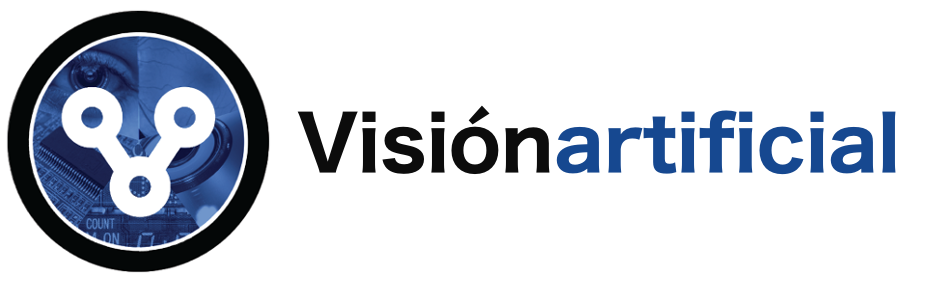

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# 3.1 Homografías 2D

Unha homografía 2D é unha transformación lineal, moi xeral, entre planos. No caderno anterior aplicamos rotacións e translacións a puntos 3D, que son exemplos de homografías euclidianas 3D.

En visión artificial, unha homografía adoita definirse como unha **transformación de perspectiva dun plano**, noutras verbas, unha reproxección dun plano imaxe dunha cámara a outra diferente, onde a cámara puido ser trasladada e/ou rotada. Como consecuencia, **dúas imaxes calquera dunha mesma superficie plana no espazo están relacionadas mediante unha homografía**. Isto ten moitas aplicacións prácticas, como a rectificación e rexistrado de imaxes, realidade aumentada, etc.

Para as homografías 2D, temos unha matriz $3x3$ que contén a transformación lineal:$\\[010pt]$


$$
\begin{bmatrix} a & b & c \\ d & e & f \\ g & h & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\  1\end{bmatrix} 
=  
\begin{bmatrix} u \\ v \\  w\end{bmatrix}\hspace{2cm} \begin{array}{rcr} x' = u\ /\ w \\ y' = v \ / \ w \end{array}\\[5pt] $$ 

<center>
    <img src="./images/intro_homography.png" width="400"/>
</center>$\\[5pt]$

Ten en conta que nestas transformacións:
- As liñas mantéñense rectas.
- Consérvanse as liñas incidentes.

**Neste caderno aprenderemos:**

- diferentes tipos de homografías (<a href="#31">sección 3.1</a>).
- como atopar os parámetros para unha homografía determinada en 2D (<a href="#32">sección 3.2</a>).
- baixo que condicións existe unha homografía (<a href="#33">sección 3.3</a>).

## Contexto do problema - Homografía no fútbol americano

O fútbol americano é un deporte de equipo que xogan dous equipos de once xogadores nun campo rectangular con postes en cada extremo. Para as cousas interesantes que imos poñer en práctica só necesitamos coñecer algúns puntos sobre este deporte:

- O ataque (o equipo con posesión) ten 4 intentos (chamados downs) para facer avanzar o balón polo menos 10 yardas (uns 9 metros).
- Se un xogador pasa a **liña de down** (amarela) co balón, o ataque terá outros 4 intentos para avanzar 10 metros (desde o punto onde se perdeu o balón).
- **Na televisión, unha liña amarela superponse electrónicamente no campo para mostrar a primeira liña de down aos espectadores. Ademais, superponse unha liña azul que indica onde comeza o xogo.**$\\[10pt]$

<img src="./images/example_football.jpg" width="500"/>$\\[3pt]$

Como podes ver na imaxe superior, o marcador indica que a ofensiva está no **3er intento** por avanzar 10 yardas (lograron avanzar 5 yardas nos intentos anteriores, polo que **o obxectivo é 5 yardas máis**). Esta información indicada dáse nun rectángulo colocado no campo que mostra **3er (intento) e 5 (yardas para o final)**.

O noso obxectivo neste caderno é **colocar a liña azul** (onde comenza o balón), a **liña amarela** (liña de down) e o **rectángulo** colocado (que dá algunha información ao público) **usando homografías**.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from math import cos,sin,pi

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
images_path = './images/'

## 3.1 Niveis de xerarquía de homografía 2D <a id="31"></a>

Empecemos polo principio. Todas as homografías 2D son transformacións lineais de puntos 2D, pero hai un nivel de xerarquía onde podemos distinguir diferentes tipos de homografías (e, polo tanto, transformacións):$\\[10pt]$

<center><img src="./images/types.png" width="450" /></center>$\\[5pt]$

Ao longo da seguinte sección cubriremos estes tipos de homografía. Imos! 

### <span style="color:orange">NIVEL 1: Translación</span>$\\[5pt]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}x + t_x \\ y + t_y \\ 1 \end{bmatrix}\\[5pt]$$

A translación é a homografía máis sinxela, xa que os píxeles do plano son **só desprazados** nas direccións $X$ e $Y$.

### **<span style="color:green"><b><i>TAREFA 1a: Xogando coa translación!</i></b></span>**

A túa primeira tarefa é:

1. Definir unha matriz de transformación `M` que aplique unha tradución arbitraria á imaxe `football.jpg`. Define unha matriz con formato `float64` (máis información sobre os tipos de datos NumPy [aquí](https://numpy.org/doc/stable/user/basics.types.html)).

2. Aplica esta homografía a unha imaxe usando a función OpenCV [`cv2.warpPerspective()`](https://docs.opencv.org/4.2.0/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e394b8e76). Bótalle un ollo aos seus argumentos de entrada.

3. Por último, mostra tanto a imaxe orixinal como a resultante.

*Nota: o tamaño da imaxe de saída depende da transformación que queremos facer, pero para os seguintes exemplos podes usar o dobre do ancho e alto da imaxe orixinal.*


<font color="blue">Saida exemplo:</font>

<img src="./images/translation.png" />

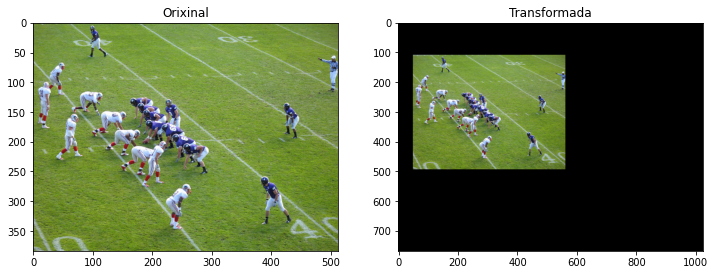

In [2]:
# Tarefa 1
# Escribe aqui o teu codigo!
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# Lemos a imaxe
image = cv2.imread(images_path + 'football.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
tx = 50
ty = 110
# Define a matriz de transformacion
M = np.array([[1,0,tx],[0,1,ty],[0,0,1]], dtype=float)

# Aplicamos a homografia
n_rows = int((image.shape)[1]*2)
n_cols = int((image.shape)[0]*2)
transformed = cv2.warpPerspective(image, M, (n_rows,n_cols))

# Visualizamos os resultados
plt.subplot(121)
plt.title("Orixinal")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformada")
plt.imshow(transformed);

### <span style="color:orange">NIVEL 2: Transformación Euclidea</span>$\\[5pt]$

Unha transformación lineal que define unha transformación euclidiana (ríxida) ten a forma:

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}cos(\theta)x - sin(\theta)y + t_x \\ sin(\theta)x + cos(\theta)y  + t_y \\ 1 \end{bmatrix}\\[5pt]$$

Como vimos no caderno anterior, esta homografía aplícase **rotación + tradución**.
*Ten en conta que a rotación faise arredor da orixe das coordenadas (0,0), que é a esquina superior esquerda da imaxe.*

### **<span style="color:green"><b><i>TAREFA 1b: A transformación Euclidea entra en xogo</i></b></span>**

Repite o exercicio anterior utilizando unha transformación euclidiana:

1. Define a matriz de transformación `M`,
2. aplícaa á imaxe,
3. visualiza a imaxe orixinal e a transformada.

<font color="blue">Exemplo:</font>

<img src="./images/euclidean_transformation.png" />

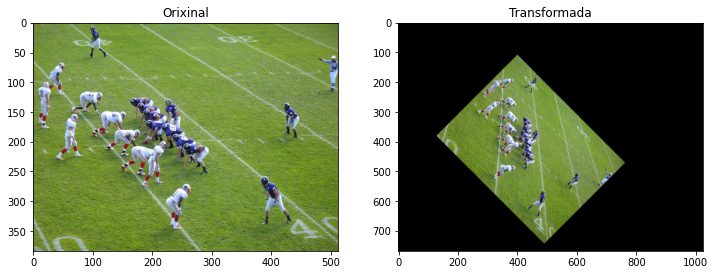

In [3]:
# Tarefa 2
# Escribe o teu codigo aqui!

# Define a matriz de transformacion
theta = np.radians(45)
tx = 400
ty = 110
# Define a matriz de transformacion
M = np.array([[np.cos(theta),-np.sin(theta),tx],[np.sin(theta),np.cos(theta),ty],[0,0,1]], dtype=float)

# Aplica a homografia
n_rows = int((image.shape)[1]*2)
n_cols = int((image.shape)[0]*2)
transformed = cv2.warpPerspective(image, M, (n_rows,n_cols))

# visualiza os resultados
plt.subplot(121)
plt.title("Orixinal")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformada")
plt.imshow(transformed);

### <span style="color:orange">NIVEL 3: Similaridade/semellanza</span>

A transformación de semellanza engade un escalado á transforamción anterior, polo que:

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} s & 0 & 0 \\ 0 & s & 0 \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} cos(\theta) & -sin(\theta) & t_x \\ sin(\theta) & cos(\theta) & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} s\cdot cos(\theta) & -s\cdot sin(\theta) & s\cdot t_x \\ s\cdot sin(\theta) & s\cdot cos(\theta) & s\cdot t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}s\cdot (cos(\theta)x - sin(\theta)y + t_x) \\ s\cdot (sin(\theta)x + cos(\theta)y  + t_y) \\ 1 \end{bmatrix}\\[5pt]$$

É dicir, esta homoografía aplícase **rotación + traslación + escala**.
*Ten en conta que a escala ten que ser igual para os dous eixes $x$ e $y$.*

### **<span style="color:green"><b><i>TAREFA 1c: Aplicar unha transformación de semellanza</i></b></span>**

Repite o exercicio anterior utilizando unha transformación de similaridade:

1. Define a matriz de transformación `M`,
2. aplícaa á imaxe,
3. visualiza a imaxe orixinal e a transformada.

<font color="blue">Exemplo:</font>

<img src="./images/similarity_transformation.png" />

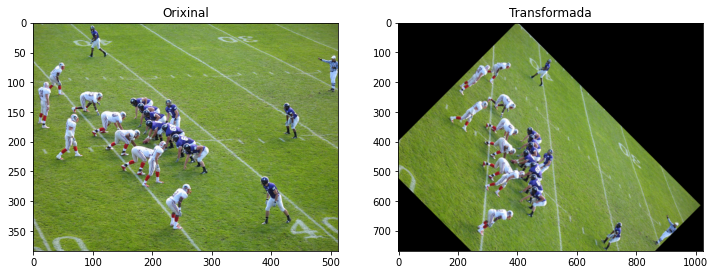

In [4]:
# Exercicio 3

# Escribe aqui o teu codigo!


# Define a matriz de transformacion
theta = np.radians(45)
scale = 1.7
tx = 400
ty = 0
# Define a matriz de transformacion
M = np.array([[scale*np.cos(theta),-scale*np.sin(theta),tx],[scale*np.sin(theta),scale*np.cos(theta),ty],[0,0,1]], dtype=float)

# Aplica a homografia
n_rows = int((image.shape)[1]*2)
n_cols = int((image.shape)[0]*2)
transformed = cv2.warpPerspective(image, M, (n_rows,n_cols))

# visualiza os resultados
plt.subplot(121)
plt.title("Orixinal")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformada")
plt.imshow(transformed);

### <span style="color:orange">NIVEL 4: Afín</span>

A transformación afín pódese definir como:

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & t_x \\ h_{10} & h_{11} & t_y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}h_{00}x + h_{01}y + t_x \\ h_{10}x + h_{11}y + t_y \\ 1 \end{bmatrix}\\[5pt]$$

Esta é unha homografía interesante porque aparece con bastante frecuencia en aplicacións reais (por exemplo, cando a variación de profundidade nun obxecto e moito menor que a distancia da cámaraao obxecto):$\\[10pt]$

<img src="./images/affine.png" width="300" />$\\[5pt]$

Podemos definilo como unha transformación **rotación + traslación + escala (diferente para cada eixe)**.

### **<span style="color:green"><b><i>TAREFA 1d: Transformación afín</i></b></span>**

Repite o exercicio anterior utilizando unha transformación afín:

1. Define a matriz de transformación `M`,
2. aplícaa á imaxe,
3. visualiza a imaxe orixinal e a transformada.

<font color="blue">Examplo:</font>

<img src="./images/affine_transformation.png" />

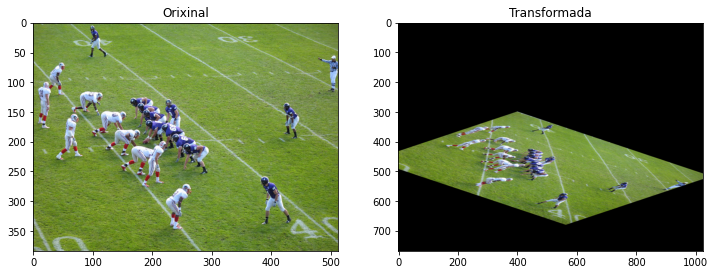

In [10]:
# Exercicio 4

# Escribe aqui o teu codigo!

# Define a matriz de transformacion
theta = np.radians(45)
s_x = 1.8
s_y = 0.6
tx = 400
ty = 300
# Define a matriz de transformacion
M = np.array([[s_x*np.cos(theta),-s_x*np.sin(theta),tx],[s_y*np.sin(theta),s_y*np.cos(theta),ty],[0,0,1]], dtype=float)


# Aplica a homografia
n_rows = int((image.shape)[1]*2)
n_cols = int((image.shape)[0]*2)
transformed = cv2.warpPerspective(image, M, (n_rows,n_cols))

# visualiza os resultados
plt.subplot(121)
plt.title("Orixinal")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformada")
plt.imshow(transformed);

### <span style="color:orange">NIVEL 5: Proxectiva</span>

E chegamos ao nivel superior, a transformación proxectiva:

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h_{11} & h_{12}\\ h_{20} & h_{21} & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \lambda \begin{bmatrix}h_{00}x + h_{01}y + h_{02}\\ h_{10}x + h_{11}y + h_{12}\\ h_{20}x + h_{21}y + 1 \end{bmatrix}\\[5pt]$$


Esta é a homografía 2D xeral xa que non ten restricións. A diferenza da transformación afín, as transformacións proxectivas aparecen na vida real cando a variación de profundidade é comparable á distancia da cámara ao obxecto:$\\[10pt]$

<img src="./images/comparison_projective.png" width="650" />$\\[5pt]$


*Ten en conta que usamos $h_{22}=1$ para fixar o factor de escala nas transformacións lineais. Esta restrición pódese substituír por $\textbf{||h|| = 1}$ (mellor).*

A transformación proxectiva é unha ferramenta poderosa, e ten moitas aplicacións. **Bótalle unha ollada ao seguinte exemplo:**

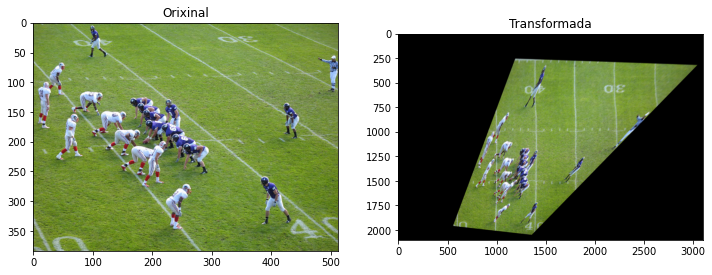

In [11]:
# Definir matriz de transformación
M = np.array([[3.1654,0.03225,1191.14702],[0.0799604,10.2911,263.9896],[-0.00014621,0.00300344,1]], dtype=np.float64)

# Aplica a homografía
transformed = cv2.warpPerspective(image, M, (3100,2100))

# Visualiza os resultados
plt.subplot(121)
plt.title("Orixinal")
plt.imshow(image)
plt.subplot(122)
plt.title("Transformada")
plt.imshow(transformed);

Como podes ver, a perspectiva da imaxe foi **eliminada** e a imaxe resultante (transformada) é *como* unha imaxe tomada desde o aire.

Pero, podes ver que o coeficiente da matriz de transformación empregada non son uns números escollidos aleatoriamente, entón como podes obter a matriz específica `M` que é capaz de facelo? A resposta curta é apartir dun conxunto de puntos correspondentes. E indo un paso máis alá: **Como se pode obter unha matriz `M` tendo pares de correspondencias**?

Como anticipo, no exemplo anterior, utilizamos as catro esquinas do rectángulo que están formando as liñas brancas e fixémolas corresponder cun rectángulo real sen perspectiva. Non te preocupes, explicaremos isto máis tarde, pero primeiro imos dar unha ollada ás matemáticas que hai detrás.

## 3.2 Resolución da homografía 2D: transformación lineal directa (DLT) <a id="32"></a>

Como sabedes, unha homografía 2D xenérica que converte un punto $p=(x,y)$ noutro punto $p'=(x',y')$ ten o seguinte aspecto (en coordenadas homoxéneas):$\\[5pt ]$

$$\lambda \begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h_{11} & h_{12}\\ h_{20} & h_{21} & 1 \end{bmatrix}\begin{bmatrix}x \\ y \\ 1 \end{bmatrix}$$


Se coñecemos as coordenadas dos puntos correspondentes en ambas imaxes, podemos construír un sistema de ecuacións para resolver os coeficientes da matriz. Ademais, coñecer unha certa cantidade de puntos correspondentes que comparten a mesma homografía permitiranos obter un sistema de ecuacións (sobre)determinado para obtelos.

Neste caso, a partir dun determinado par de puntos $i$, podemos formar un sistema de ecuacións lineais para obter as variables da matriz:$\\[5pt]$


$$\begin{eqnarray}
x'_i = \frac{h_{00}x_i + h_{01}y_i + h_{02}}{h_{20}x_i + h_{21}y_i + 1}\  \longrightarrow \ x'_i(h_{20}x_i + h_{21}y_i + 1) = h_{00}x_i + h_{01}y_i + h_{02} \\[10pt]
y'_i = \frac{h_{10}x_i + h_{11}y_i + h_{12}}{h_{20}x_i + h_{21}y_i + 1}\ \longrightarrow \ y'_i(h_{20}x_i + h_{21}y_i + 1) = h_{10}x_i + h_{11}y_i + h_{12}
\end{eqnarray}
$$
$\\[10pt]$

Isto pode ser reescrito como: 

$$A\mathbf{h} = 0 \longrightarrow
\begin{bmatrix}
-x_i & -y_i & -1 & 0 & 0 & 0 & x'_ix_i & x'_iy_i & x'_i \\
0 & 0 & 0 & -x_i & -y_i & -1 & y'_ix_i & y'_iy_i & y'_i
\end{bmatrix} 
\begin{bmatrix}
h_{00} \\ h_{01} \\ h_{02} \\ h_{10} \\ h_{11} \\ h_{12} \\ h_{20} \\ h_{21} \\ 1
\end{bmatrix} 
=
\begin{bmatrix}
0 \\ 0 
\end{bmatrix} 
\\[5pt]
$$

Podes ver que con menos de 4 puntos independentes ($rank(A) \lt 8$), hai infinitas solucións detrás de $k\textbf{h}$.

Pero, se temos **4 ou máis pares de puntos independentes** podemos construír a seguinte expresión:$\\[5pt]$


$$Ah = 0 \longrightarrow
\begin{bmatrix}
-x_1 & -y_1 & -1 & 0 & 0 & 0 & x'_1x_1 & x'_1y_1 & x'_1 \\
0 & 0 & 0 & -x_1 & -y_1 & -1 & y'_1x_1 & y'_1y_1 & y'_1 \\
& & & &\vdots \\
-x_n & -y_n & -1 & 0 & 0 & 0 & x'_nx_n & x'_ny_n & x'_n \\
0 & 0 & 0 & -x_n & -y_n & -1 & y'_nx_n & y'_ny_n & y'_n \\
\end{bmatrix} 
\begin{bmatrix}
h_{00} \\ h_{01} \\ h_{02} \\ h_{10} \\ h_{11} \\ h_{12} \\ h_{20} \\ h_{21} \\ 1
\end{bmatrix} 
= 
\begin{bmatrix}
0 \\0\\ \vdots \\ 0 \\ 0
\end{bmatrix} 
$$


- Para $\textbf{n = 4}$ **pares de puntos independentes** ($rank(A) = 8$), hai unha solución $k\textbf{h}$ con $\textbf{h} \ne 0, k \ne 0$. Isto debería ser suficiente (e en rigor o é, como probaremos máis adiante), pero a solución verase moi afectada polo ruído nas coordenadas dos puntos, polo que non se adoita empregar en aplicacións con puntos detectados automaticamente, senón para aqueles elixidos manualmente. $\\[5pt]$
- Para $\textbf{n > 4}$ **pares de puntos independentes** ($rank(A) \gt 8$), (por exemplo, aqueles pares de puntos detectados por SIFT ou Harris) non hai solución (aparte de $\textbf{h} = 0$) xa que o sistema está sobredeterminado. Non obstante, podemos obter a solución que minimiza o erro nas coordenadas dos puntos (é dicir, a solución de mínimos cadrados): $\\[5pt]$

    - Arg. min$_h ||\textbf{Ah}||^2$ con $||\textbf{h}|| = 1$$\\[5pt]$
    - Solución $\hat{h}$: vector propio do menor valor propio de $A^TA$
    
Teña en conta que se coñece o tipo específico de transformación, pode necesitar menos puntos para resolver este sistema de ecuacións:

- **Translación** (2 incógnitas) $\rightarrow$ **Necesítase 1 par de puntos**
- **Euclidiana** (3 incógnitas) $\rightarrow$ **Necesítanse 2 pares de puntos**
- **Semellanza** (4 incógnitas) $\rightarrow$ **Necesítanse 2 pares de puntos**
- **Afín** (6 incógnitas) $\rightarrow$ **Necesítanse 3 pares de puntos**
- **Proxectiva** (8 incógnitas) $\rightarrow$ **Necesítanse 4 pares de puntos**

Pero, como dixemos, normalmente, necesitas moitos máis puntos para a robustez do ruído, polo que isto non é relevante.

Ademais, cada tipo de transformación implica certas transformacións e invarianzas, a seguinte táboa resume isto:$\\[10pt]$



<table>
<tbody>
<tr style="height: 23px;border: 1px solid black;">
<th style="height: 23px;border: 1px solid black;">&nbsp;</td>
<th style="height: 23px;border: 1px solid black;">Euclideana </td>
<th style="height: 23px;border: 1px solid black;">&nbsp;Semellanza</td>
<th style="height: 23px;border: 1px solid black;">&nbsp;Afín</td>
<th style="height: 23px;border: 1px solid black;">&nbsp;Proxectiva</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<th style="height: 23px;border: 1px solid black;">&nbsp;Transformacións:</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Rotación, translación</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Isotropía na escala</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Escala eixes</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Transformación de Perspectiva</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<th style="height: 23px;border: 1px solid black;">&nbsp;Invariantes:</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
<td style="height: 23px;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Distancia</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Ángulos, cocientes entre distancia</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">Paralelas, centro de masas</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;</td>
</tr>
<tr style="height: 23px;border: 1px solid black;">
<td style="height: 23px;border: 1px solid black;">&nbsp;Proporcións entre distancias (cross-ratio)</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
<td style="height: 23px;border: 1px solid black;">&nbsp;x</td>
</tr>
</tbody>
</table>

### Apliquemos os coñecementos adquiridos!

Agora que sabemos como resolver a homografía 2D, volvamos ao noso problema do fútbol americano.

Imos traballar coa imaxe `football-big.jpg`, que é a mesma que se utilizou nos exercicios anteriores pero cunha mellor resolución e calidade.

Corguemos a imaxe e visualizamola:

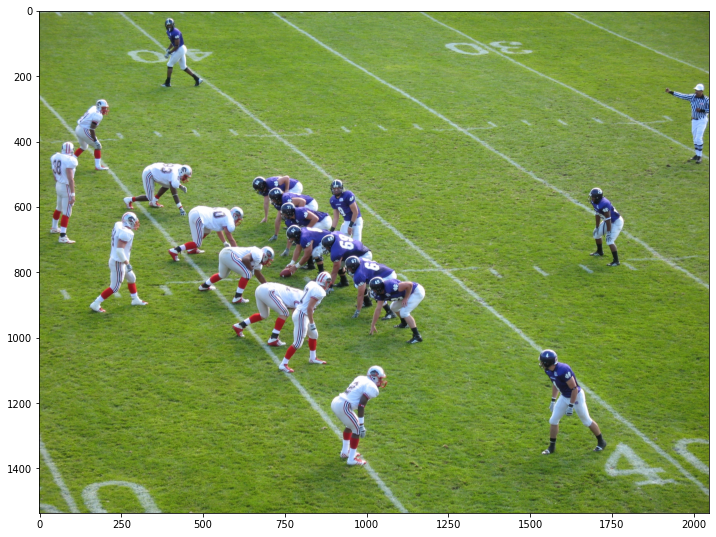

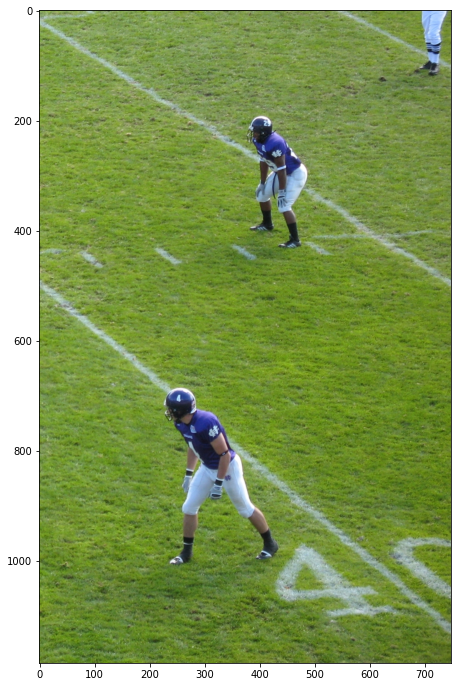

In [42]:
# Tarefa 5a
# Escribe aqui o teu codigo!

matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

# Lemos a imaxe
image = cv2.imread(images_path + 'football-big.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Visualizamos
plt.imshow(image)
plt.figure()
plt.imshow(image[350:,1300:]);


A nosa primeira tarefa é engadir a imaxe `marker.jpg` ao campo.

<img src="./images/marker.jpg" width="150" />$\\[5pt]$

Lembra que isto significa: 3rd (intento) e 3 (yardas para o final). Para engadir unha imaxe sen perspectiva a unha imaxe con perspectiva, o primeiro paso é **eliminar a perspectiva** da imaxe orixinal, e para iso imos *mapear* os puntos dun rectángulo no campo a **un rectángulo real**, pero mantendo a relación entre as lonxitudes dos lados do rectángulo (lembra que unha transformación proxectiva só é invariante ás distancias cruzadas!):

<img src="./images/points-homography.png" width="800" />$\\[5pt]$

Agora que temos catro puntos correspondentes (seleccionados manualmente), imos calcular a matriz de transformación desa homografía proxectiva. Isto é sinxelo en openCV, xa que ofrece o método [`cv2.findHomography()`](https://docs.opencv.org/4.2.0/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780), que leva dúas listas cos puntos correspondentes como entrada:
- a primeira lista contén as coordenadas de entrada $(x_i,y_i)$ e
- o segundo enumera as súas correspondencias $(x'_i,y'_i)$.

*Ten en conta que eses puntos representan coordenadas, o seu formato é $(n\_col, n\_row)$*.

### **<span style="color:green"><b><i>TAREFA 2a: Obtención da matriz de transformación</i></b></span>**

**A túa tarefa é** recuperar a matriz de transformación que transforma os puntos da imaxe con perspectiva a outra sen ela. Para iso:

1. Colle as **catro esquinas do rectángulo especificado** (podes usar unha ferramenta externa para obter as coordenadas),
2. e obtén a matriz de transformación que elimina a perspectiva do campo de fútbol. Para iso tes que definir dous pares de correspondencias, `pts_src` e `pts_dst`, enlazando puntos da primeira imaxe con puntos da segunda.
3. Despois **use [`cv2.warpPerspective()`](https://docs.opencv.org/4.2.0/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) para obter a matriz de transformación e eliminar a perspectiva e **visualiza a imaxe resultante**.
4. Por último, gárdao no teu ordenador, necesitarémolo para o seguinte exercicio.

*Lembre que o rectángulo de saída debe manter a proporción do campo de fútbol orixinal ($10\ /\ 6.16 \approx 1.6$) cando defina a lista dos puntos correspondentes e, para efectos de cálculo, use números que sexan "semellantes".*

<font color="blue">Saída esperada na seguinte tarefa.</font>

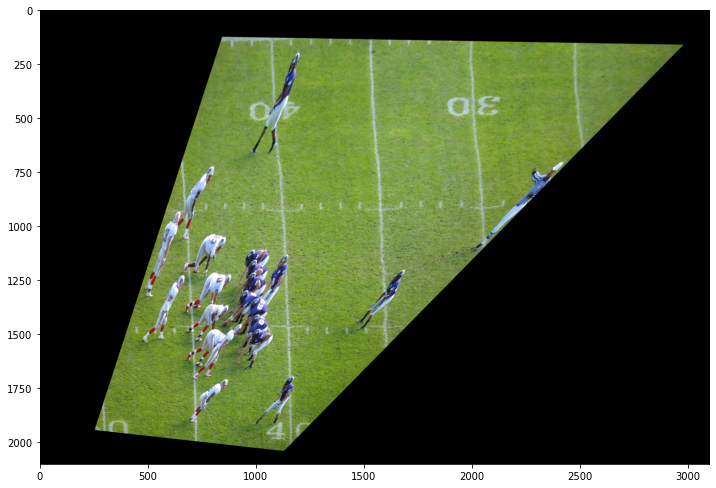

In [75]:
# Exercicion 2a

# Puntos dun rectangulo no campo
pts_src = np.array([[150,380],[1300,350],[500,820],[1900,750]])

# Puntos dun rectangulo sen perpectiva con proporcion entre os lados de r=1.6
pts_dst = np.array([[700,900], [1600,900], [700,1455],[1600,1455]])

# Calculamos a homografia
M, status = cv2.findHomography(pts_src, pts_dst)

# Deformamos a imaxe orixe ata a destino en función da homografía
no_perspective = cv2.warpPerspective(image, M, (3100,2100))

# Visualizamos a imaxe sen perpectica
plt.imshow(no_perspective)

# gardamos a imaxe
im_out = cv2.cvtColor(no_perspective,cv2.COLOR_RGB2BGR)
cv2.imwrite(images_path + "no_perspective.jpg",im_out);

### Superposición dunha imaxe

Agora que temos o campo sen perspectiva, podemos engadir o marcador á imaxe en calquera lugar.

Como queremos **engadir a liña inicial e  de down na imaxe orixinal**, necesitamos **tomar dous puntos para cada liña na imaxe** (nota que agora as liñas son liñas verticais, así que toma puntos coa mesma coordenada $x$ para ambas liñas). No seguinte exercicio aplicaremos a homoografía inversa a eses puntos polo que será posible trazar a liña na imaxe orixinal. **A liña de down debe estar a 3 metros da liña de saída** (cada segmento vertical pequeno marca un metro e as liñas verticais marcan cinco metros).

### **<span style="color:green"><b><i>EXERCICIO 2b: Engadindo o marcador</i></b></span>**

Engade o marcador á imaxe sen perspectiva e visualizao, toma tamén os puntos mencionados anteriormente. A imaxe resultante debería verse así:$\\[5pt]$

<img src="./images/marker-example.png" width="600" />$\\[5pt]$

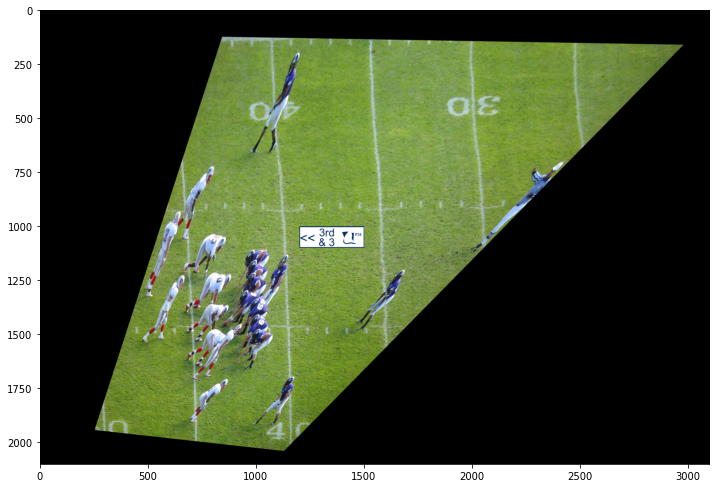

In [142]:
#Exercicio 2b

# Lemos a imaxe do marcador.
marker = cv2.imread(images_path + 'marker.jpg')
marker = cv2.cvtColor(marker,cv2.COLOR_BGR2RGB)

# Averiguamos as filas e columnas da imaxe marcador
h,w = marker.shape[:-1]

# Eleximos a posición do marcador
x, y = 1200, 1000

# Coloca o marcador na imaxe do campo de fútbol sen perspectiva
no_perspective[y:y+h, x:x+w] = marker

# Visualizamos
plt.imshow(no_perspective)

# Escolle dous puntos homoxéneos contidos na liña de saída
start_line = np.array([[850,850],[2000,1200],[1,1]])

# Escolle dous puntos homoxéneos contidos na liña de down
down_line = np.array([[600,600],[1800,1500],[1,1]]);

### Realidade aumentada

É hora de restaurar a perspectiva inicial, para iso **aplica unha homografía usando a inversa da matriz de transformación anterior**:

$$\lambda \begin{bmatrix}x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} h_{00} & h_{01} & h_{02} \\ h_{10} & h_{11} & h_{12}\\ h_{20} & h_{21} & 1 \end{bmatrix}^{-1}\begin{bmatrix}x' \\ y' \\ 1 \end{bmatrix}$$

### **<span style="color:green"><b><i>EXERCICIO 2c: Volvendo á perspectiva inicial, pero coa marca!</i></b></span>**

Calcula a inversa da matriz de transformación usando [`numpy.linalg.inv()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) e invertimos a perspectiva da imaxe co marcador utilizando a nova homografía. Visualizao.

*Agora, deberías ver que o marcador ten a mesma perspectiva que a imaxe orixinal.*

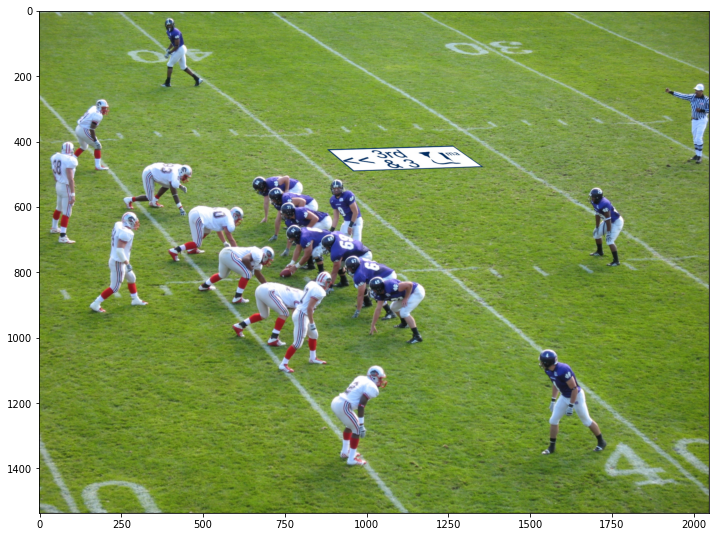

In [143]:
# Exercicio 2c

# Calcula a inversa da homografia
invM = np.linalg.inv(M)

# Obetemos a imaxe coa perpectiva inicial
n_rows = image.shape[1]
n_cols = image.shape[0]
perspective = cv2.warpPerspective(no_perspective, invM, (n_rows,n_cols))

# Visualizamos
plt.imshow(perspective);

### É hora de incluír as liñas

Finalmente, é hora de **debuxar as liñas**. Deberías ter gardado as coordenadas dos dous puntos para cada liña da imaxe sen perspectiva.

Para a homografía de liñas, só tes que **aplicar a homografía a dous puntos da liña**. Deste xeito, terás dous puntos na imaxe orixinal que definen a liña con perpectiva.

Teña en conta que `cv2.line()` ten dous puntos como entrada, pero só debuxa a liña do segmento. Terás que **estender ese segmento** usando a pendente da recta ata que cruce todo o campo de xogo.


$$pendente = \frac{y_2-y_1}{x_2-x_1}$$

Os novos puntos serán:

$$\begin{eqnarray}
x'_1,\ \  y'_1 = x_1 + extension,\ \ y_1 + extension\times pendente\\[3pt]
x'_2,\ \  y'_2 = x_2 - extension,\ \  y_2 - extension\times pendente
\end{eqnarray}$$

### **<span style="color:green"><b><i>TAREFA 2d: Debuxando as liñas</i></b></span>**

Aplica a **homografía inversa** aos puntos da liña, **estende** o segmento de liña e **debuxa** a liña de inicio (azul) e a liña de down (amarela). Finalmente, visualiza a imaxe resultante.

Esta imaxe resultante debería verse así:$\\[5pt]$

<img src="./images/result.png" width="400" />$\\[5pt]$

1402.8524938360588 543.7920433319335


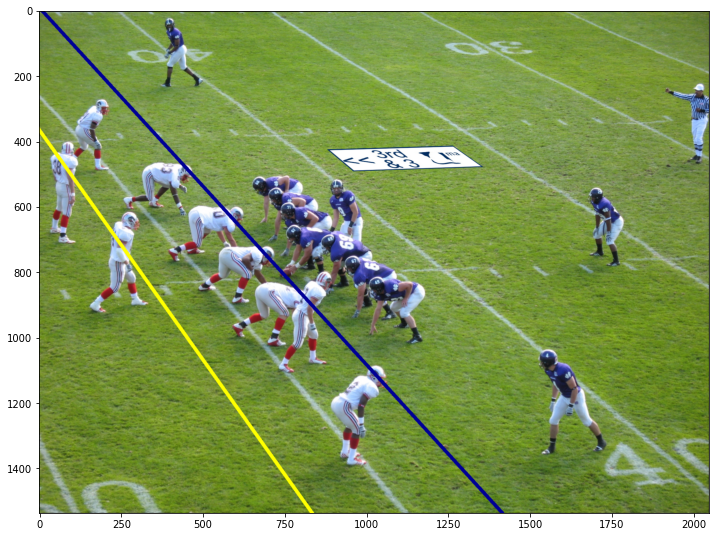

In [144]:
# Exercicio 2d

# Aplicar homografía inversa aos puntos da liña inicial tomados na imaxe sen perspectiva
start_line_perspective = invM @ start_line
start_line_perspective = (start_line_perspective / start_line_perspective[2])[0:2]

x1,y1 = start_line_perspective[0,0], start_line_perspective[1,0]
x2,y2 = start_line_perspective[0,1], start_line_perspective[1,1]
print(x1,x2)
# Calcula a pendente para estender o segmento de recta
slope = (y2-y1)/(x2-x1)

# Estende o segmento de liña
ext = 3000
x1,y1 = int(x1+ext), int(y1+ext*slope)
x2,y2 = int(x2-ext), int(y2-ext*slope)

# Debuxamos a liña de inicio
pers_with_lines = perspective.copy()
pers_with_lines = cv2.line(pers_with_lines, (x1,y1), (x2,y2),thickness=10,color=[0,0,150])

# Aplica a homoografía inversa aos puntos da liña de down tomados na imaxe sen perspectiva
down_line_perspective = invM @ down_line
down_line_perspective = (down_line_perspective / down_line_perspective[2])[0:2]

x1,y1 = down_line_perspective[0,0], down_line_perspective[1,0]
x2,y2 = down_line_perspective[0,1], down_line_perspective[1,1]

# Calcula a pendente para estender o segmento de recta
slope = (y2-y1)/(x2-x1)

# Estende o segmento de liña
ext = 3000
x1,y1 = int(x1+ext), int(y1+ext*slope)
x2,y2 = int(x2-ext), int(y2-ext*slope)

# Debuxamos a liña de inicio
pers_with_lines = cv2.line(pers_with_lines, (x1,y1), (x2,y2),thickness=10,color=[255,255,0])

# Visualizamos a imaxe final!
plt.imshow(pers_with_lines);

### Unha segunda forma cando se trata de liñas: empregando a súa ecuación

Unha forma alternativa de aplicar unha homoografía a unha liña é considerando a súa ecuación:

$$ax+by+c=0$$

Logo a liña é $l=[a,b,c]^T$. Deste xeito, unha liña vertical na imaxe sen proxección estaría representada por un vector da forma $l'=[1, 0, -x]^T$, polo que só necesitamos a coordenada $x$ (columna) para construír esta liña!

Unha vez que dispoñemos da liña $l'$, a mesma homoografía utilizada para transformar puntos pódese utilizar aquí para obter o seu equivalente na imaxe con proxección:

$$l = H^T l'$$

Incrible, non? Bótalle un ollo ao seguinte código que realiza estes cálculos e obterás os mesmos resultados que antes.

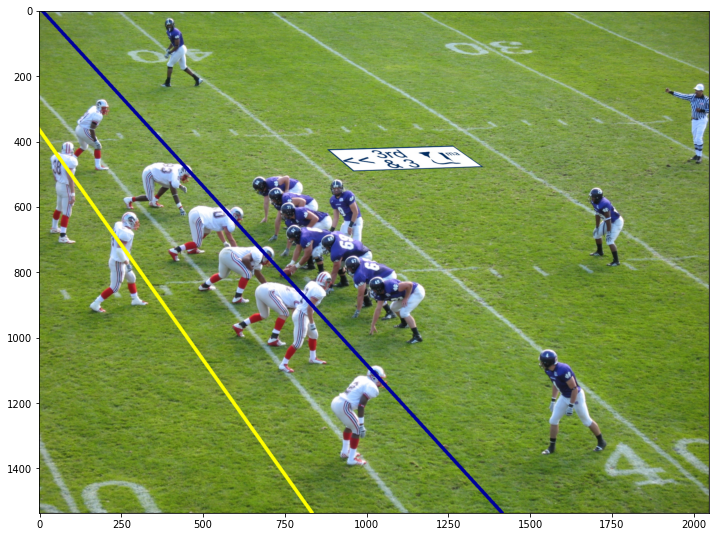

In [145]:
pers_with_lines = perspective.copy()

x1 = start_line[0,0]

l_h = np.vstack(np.array([1,0,-x1]))

l = M.T@l_h
n_y1 = 0
n_y2 = pers_with_lines.shape[0]
n_x1 = int((-l[1]*n_y1-l[2])/l[0])
n_x2 = int((-l[1]*n_y2-l[2])/l[0])
pers_with_lines = cv2.line(pers_with_lines, (n_x1,n_y1), (n_x2,n_y2),thickness=10,color=[0,0,155])

x1 = down_line[0,0]

l_h = np.vstack(np.array([1,0,-x1]))

l = M.T@l_h
n_y1 = 0
n_y2 = perspective.shape[0]
n_x1 = int((-l[1]*n_y1-l[2])/l[0])
n_x2 = int((-l[1]*n_y2-l[2])/l[0])

pers_with_lines = cv2.line(pers_with_lines, (n_x1,n_y1), (n_x2,n_y2),thickness=10,color=[255,255,0])

plt.imshow(pers_with_lines);

### <font color="blue"><b><i>Reflexionando</i></b></font>

**Agora estás nunha boa posición para responder a estas preguntas:**

- Poderías recuperar a homografía M empregando 3 correspondencias entre puntos da tarefa 2? Por que?

     <p style="margin: 4px 0px 6px 5px; color:blue"><i>Necesitas minimos 4 correspondencias, si non o sistema ten infinitas solucions</i></p>
    
- Poderías recuperar a homografía M empregando 5 correspondencias entre puntos da tarefa 2? Se si, como?

     <p style="margin: 4px 0px 6px 5px; color:blue"><i>Si, a parte seria un sistema sobredeterminado o que permite eliminar ruido</i></p>
  
- Por que tivemos que aplicar unha transformación proxectiva na nosa aplicación de fútbol americano na tarefa 2? Podería ser substituído por algún outro?

     <p style="margin: 4px 0px 6px 5px; color:blue"><i>Poderiase tamen intentar utilizar unha transformación afin pero tendriamos restrinciones nalguns eixes</i></p>
    
- Que tipo de transformación define a seguinte matriz?

      [[  1.06066017  -1.06066017 450.        ]
      [  1.06066017   1.06066017 -75.        ]
      [  0.           0.           1.        ]]
    
     <p style="margin: 4px 0px 6px 5px; color:blue"><i>Unha transformación de semellanza</i></p>

## 8.3.3 Cando se pode aplicar unha homografa? <a id="833"></a>

A este campo de fútbol aplicamos unha homografía porque é unha transformación **entre planos**, pero se miras ao xogador superior da imaxe *aérea*, podes ver que a transformación non é boa para nada. Entón, necesitamos saber cando podemos aplicar unha homoografía.

Pódese dicir que hai unha homografía $H_{3\times3}$ entre puntos nestes 3 casos:


<img src="./images/applications.png" width="800" />

Neste exercicio emulamos unha **cámara fotográfica** e transformamos un plano de imaxe noutro. Dado que os xogadores non están no mesmo plano que o campo de fútbol, a homografía non vale para eses puntos.

Por outra banda, tamén existe unha homografía **para unha cámara rotativa que observa unha escena non plana**. En realidade, este sería o seguinte paso para a **costura de imaxes (imaxes panorámicas)** despois de calcular coincidencias con puntos clave. Xa temos as correspondencias usando Harris ou SIFT, polo que a homografía debería ser fácil de obter.$\\[5pt]$

<img src="./images/stitching.png" width="800" />$\\[5pt]$

Finalmente, hai unha homografía para unha **cámara en movemento que observa un plano**. Este é o caso típico de 2 imaxes dun cadro tomadas desde diferentes posicións:$\\[5pt]$

<img src="./images/painting.png" width="400" />

## ## Conclusión

Bo traballo! As homografías son unha ferramenta moi importante na visión artificial. Neste caderno aprendiches:

- que é unha homografía, como resolvela e como aplicala,
- cando se pode utilizar unha homografa,
- como aplicar homografas a liñas,
- Algunhas aplicacións da homografía que se empregan actualmente en deportes  (colocar anuncios publicitarios nos campos de fútbol ou en pistas de tenis, etc.)